## CPE 695 HWK 3 ___ Yuhui Ren

__Step 1:__ <br>
read in Titanic.csv and observe a few samples, some features are categorical and others are numerical. Take a random 80% samples for training and the rest 20% for test.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.tree import export_graphviz
import graphviz
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [115]:
data = pd.read_csv("Titanic.csv")
data.head(3)

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1st,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.337494,B5,Southampton,2,NaN,"St Louis, MO"
1,2,1st,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.550003,C22 C26,Southampton,11,NaN,"Montreal, PQ / Chesterville, ON"
2,3,1st,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [116]:
data = data[["pclass", "sex", "age", "sibsp", "survived"]]
data.replace({"pclass":{"1st":1, "2nd":2, "3rd":3}}, inplace=True)
data.replace({"sex":{"male":1, "female":2}}, inplace=True)

data.head(3)

,pclass,sex,age,sibsp,survived
0,1,2,29.0000,0,1
1,1,1,0.9167,1,1
2,1,2,2.0000,1,0


In [117]:
data = data.fillna(data['age'].mean())

In [118]:
X = data[["pclass", "sex", "age", "sibsp"]]
y = data["survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

__Step 2:__<br> 
fit a decision tree model using independent variables ‘pclass + sex + age + sibsp’ and dependent variable ‘survived’. Plot the full tree. Make sure ‘survived’ is a qualitative variable taking 1 (yes) or 0 (no) in your code.

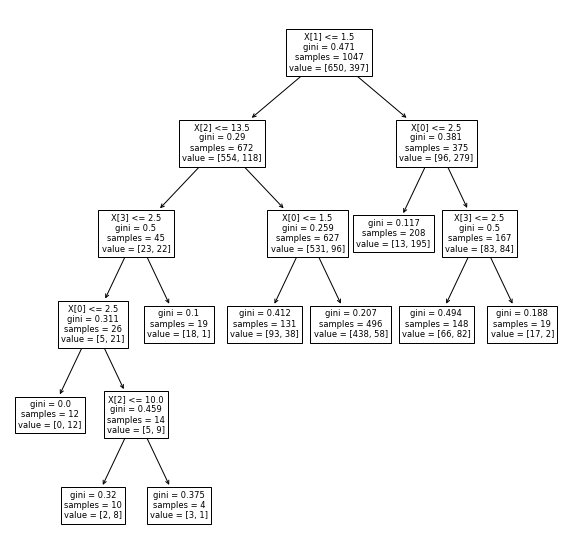

In [119]:
clf = tree.DecisionTreeClassifier(max_leaf_nodes=9)
model = clf.fit(X_train, y_train)

plt.figure(figsize=(10,10))
tree.plot_tree(model)
plt.show()

__Step 3:__<br> 
print out the performance measures of the full model: in‐sample and out-of‐sample accuracy, defined as following:<br>
in‐sample percent survivors correctly predicted (on training set)<br>
in-sample percent fatalities correctly predicted (on training set)<br>
out‐of‐sample percent survivors correctly predicted (on test set)<br>
out-of‐sample percent fatalities correctly predicted (on test set)

In [120]:
y_hat_train = model.predict(X_train)
tn, fp, fn, tp = confusion_matrix(y_train, y_hat_train).ravel()    # on trianing set

print("in‐sample survivors accuracy (on training set):{:.3f}".format(tp/(tp+fn)))
print("in‐sample fatalities accuracy (on training set):{:.3f}".format(tn/(fp+tn)))
print(tn, fp, fn, tp)

in‐sample survivors accuracy (on training set):0.748
in‐sample fatalities accuracy (on training set):0.875
569 81 100 297


In [121]:
y_hat_test = model.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_hat_test).ravel()    # on testing set

print("out‐of‐sample survivors accuracy (on testing set):{:.3f}".format(tp/(tp+fn)))
print("out‐of‐sample fatalities accuracy (on testing set):{:.3f}".format(tn/(fp+tn)))
print(tn, fp, fn, tp)

out‐of‐sample survivors accuracy (on testing set):0.631
out‐of‐sample fatalities accuracy (on testing set):0.805
128 31 38 65


__Step 4:__<br> 
use cross‐validation to find the best parameter to prune the tree. You should be able to plot a graph with the ‘tree size’ as the x-axis and ‘number of misclassification’ as the Y-axis. Find the minimum number of misclassification and choose the corresponding tree size to prune the tree.

In [122]:
misclass = []
tree_size = [2,3,4,5,6,7,8,9,10]

for leaf_node in tree_size:
    clf = tree.DecisionTreeClassifier(max_leaf_nodes=leaf_node)
    model = clf.fit(X_train, y_train)
    y_hat = model.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_hat).ravel() 
    misclass_num = fp+fn
    misclass.append(misclass_num)

    
print(misclass)

[74, 74, 74, 69, 69, 69, 69, 69, 69]


Text(0, 0.5, 'Misclass Numbers')

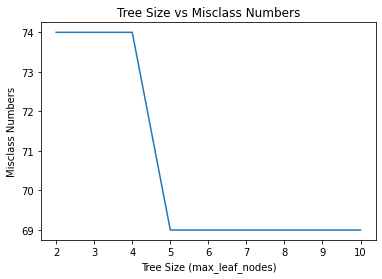

In [123]:
plt.plot(tree_size, misclass)
plt.title('Tree Size vs Misclass Numbers')
plt.xlabel('Tree Size (max_leaf_nodes)')
plt.ylabel('Misclass Numbers')

Answer:<br>
From this plot, we can see when max_leaf_nodes is 5, model has the lowest misclass numbers. 

__Step 5:__<br> 
prune the tree with the optimal tree size. Plot the pruned tree.

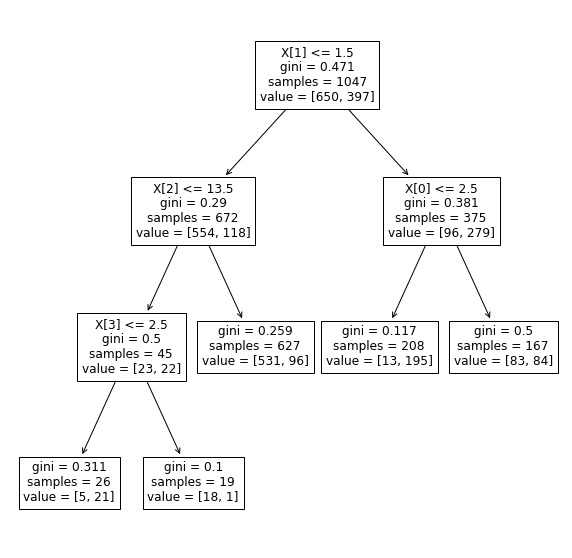

In [124]:
clf = tree.DecisionTreeClassifier(max_leaf_nodes=5)
model = clf.fit(X_train, y_train)

plt.figure(figsize=(10,10))
tree.plot_tree(model)
plt.show()

__Step 6:__<br> 
For the final pruned tree, report its in‐sample and out‐of‐sample accuracy<br> 
Check whether there is improvement in out‐of‐sample for the full tree (bigger model) and the pruned tree (smaller model)

In [125]:
y_hat_train = model.predict(X_train)
tn, fp, fn, tp = confusion_matrix(y_train, y_hat_train).ravel()    # on trianing set

print("in‐sample survivors accuracy (on training set):{:.3f}".format(tp/(tp+fn)))
print("in‐sample fatalities accuracy (on training set):{:.3f}".format(tn/(fp+tn)))

in‐sample survivors accuracy (on training set):0.756
in‐sample fatalities accuracy (on training set):0.845


The in‐sample survivors accuracy incresed from 0.748 (bigger model) to 0.756 (smaller model).

In [126]:
y_hat_test = model.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_hat_test).ravel()    # on testing set

print("out‐of‐sample survivors accuracy (on testing set):{:.3f}".format(tp/(tp+fn)))
print("out‐of‐sample fatalities accuracy (on testing set):{:.3f}".format(tn/(fp+tn)))

out‐of‐sample survivors accuracy (on testing set):0.641
out‐of‐sample fatalities accuracy (on testing set):0.799


The out‐of‐sample survivors accuracy increased from 0.631 (bigger model) to 0.641 (smaller model).